In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import json as js
from collections import Counter
import community 


def parseDataset(path):
    df = pd.read_table(path, delimiter='\t', names=['source','target'])
    return df

In [29]:
#Graph creation
dataset_path= "dataset.txt"
data = parseDataset(dataset_path)
G= nx.from_pandas_edgelist(data,"source","target")

In [30]:
#Largest component
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)
largest_component = G.subgraph(core_nodes).copy()
core_degree_sequence = sorted([d for n, d in largest_component.degree()], reverse=True)  # degree sequence


In [31]:
#generic analysis
print(G)
print(largest_component)


Graph with 58228 nodes and 214078 edges
Graph with 56739 nodes and 212945 edges


In [32]:
#distances analysis (ci metterà una vita, la giant component richiederà ore)

#distances_sum = 0
#all_p = []
#for C in (G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len, reverse=True)):
#    p = dict(nx.shortest_path_length(C)) #questo conterrà tutte le distanze, per poter guardare max, min e media
#    all_p.append(p)
#    distance = nx.average_shortest_path_length(C)
#    print(distance)
#    distances_sum += distance

#print("Average distance: ", distances_sum/len(nx.connected_components(G)))
#print("Max distance: ", max(p.values() for p in all_p))
#print("Min distance: ", min(p.values() for p in all_p))
#with open('measures.txt', 'w') as f:
#    print(f"distance sum: {distances_sum}\n", file=f)
#    print(all_p, file=f)
    

In [33]:
#clustering coefficient
print("Clustering coefficient: "+str(nx.average_clustering(G)))
print("Clustering coefficient: "+str(nx.average_clustering(largest_component)))


Clustering coefficient: 0.17232592744613273
Clustering coefficient: 0.17337881358774052


Il grafo è connesso? False
Componenti connesse: 547
largest connected component size: 56739
[56739, 49, 11, 11, 10, 10, 9, 8, 8, 7]


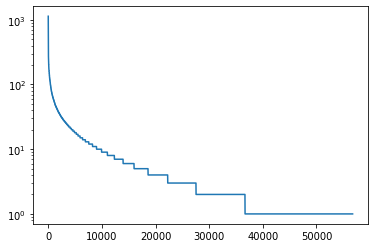

In [17]:
#largest connected component
print("Il grafo è connesso? "+str(nx.is_connected(G)))
print("Componenti connesse: "+ str(nx.number_connected_components(G)))
print("largest connected component size: {len(core_nodes)}")
print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)][0:10])

#analizzo i degree all'interno della sola largest connected components per scoprire se la sua dimensione è dovuta a molti nodi che si incontrano oppure a supernodi Hub

plt.yscale('log')
plt.plot(core_degree_sequence)
#nx.draw(core, with_labels=True)

average degree: 7.353094731057223
21157
degree sequence: [1134, 1055, 854, 838, 833, 779, 732, 569, 550, 475, 467, 453, 448, 404, 386, 379, 354, 343, 337, 334, 333, 332, 327, 326, 325, 321, 311, 310, 306, 301, 299, 296, 292, 289, 282, 274, 272, 271, 270, 270, 270, 267, 267, 266, 264, 259, 257, 256, 254, 253, 253, 248, 242, 241, 230, 230, 228, 228, 228, 227, 226, 225, 225, 221, 218, 218, 215, 214, 214, 213, 213, 212, 211, 210, 210, 210, 210, 209, 207, 206, 206, 205, 204, 203, 202, 202, 202, 201, 201, 198, 198, 194, 193, 192, 192, 191, 190, 190, 190, 190]


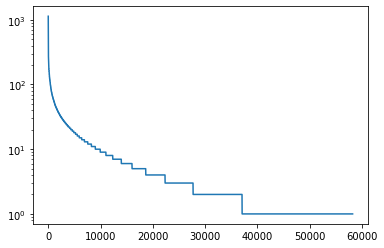

In [35]:
#degree analysis
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
plt.yscale('log')
plt.plot(degree_sequence)

print("average degree: " + str(sum(degree_sequence)/len(degree_sequence)))
#wtf? average degree 7?
print(degree_sequence.count(min(degree_sequence)))
#ah, ecco perchè.

print("degree sequence: " + str(degree_sequence[0:100]))

In [19]:
#Degree correlation
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(G)))
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(largest_component)))

Degree correlation: 0.010815796314560526
Degree correlation: 0.009622679947904176


Largest component
200
G
739


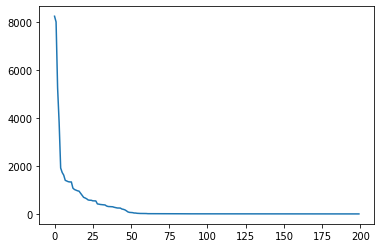

In [36]:
largest_component_communities = community.community_louvain.best_partition(largest_component)
G_communities = community.community_louvain.best_partition(G)
# number of communities
#print(Counter(communities.values()))
counter_lc = Counter(largest_component_communities.values())
counter_G = Counter(G_communities.values())
print("Largest component")
#print(counter_lc)
print(len(counter_lc))
print("G")
#print(counter_G)
print(len(counter_G))
plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#per ignorare quelle da due è meglio valutare solo la largest_component


'si nota subito una grossa comunità centrale (la 1) ma è interessante anche notare che c\'è un cluster di comunità che fungono da "intermediari"\ntra le comunità di sinistra e quelle di destra. la 1 è assolutamente un hub (ed è la comunità più grossa),ma le altre nel mezzo permettono il collegamento.\n'

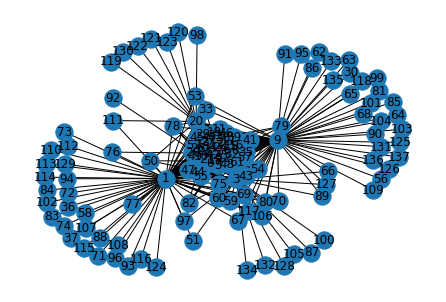

In [21]:
#plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#TODO: aggiustare la dimensione dell'immagine, se si decommenta la linea precedente il grafo delle comunità diventa un amoung us
#per ignorare quelle da due è meglio valutare solo la largest_component
induced_graph = community.induced_graph(largest_component_communities, largest_component, weight='WEIGHT')
induced_graph.remove_edges_from(nx.selfloop_edges(induced_graph))

nx.draw(induced_graph, with_labels=True, pos=nx.spring_layout(induced_graph))
'''si nota subito una grossa comunità centrale (la 1) ma è interessante anche notare che c'è un cluster di comunità che fungono da "intermediari"
tra le comunità di sinistra e quelle di destra. la 1 è assolutamente un hub (ed è la comunità più grossa),ma le altre nel mezzo permettono il collegamento.
'''

In [39]:
#centrality analysis
#troppo grande per nx.closeness_centrality(G)
#print(nx.closeness_centrality(G))
betw_dict = nx.betweenness_centrality(G,k=100).values()

betw = sum(betw_dict)/len(G)
print("betweenness centrality: "+str(betw))
#sarebbe interessante valutare la betwenness di alcuni nodi particolari
betw_list = list(betw_dict)
betw_list.sort(reverse=True)
len_betw_list = len(betw_dict)
i =  0
for b  in betw_list:
    if b==0.0:
        i+=1

print("Lunghezza totale delle betwennes(una per nodo):"+ str(len_betw_list))
print(betw_list[0:10])
print("quantità di 0.0: "+str(i))
print("quantità di rimanenti diversi: "+str(len_betw_list-i))
print("rapporto: "+str((len_betw_list-i)/len_betw_list))

betweenness centrality: 6.590178820545939e-05
Lunghezza totale delle betwennes(una per nodo):58228
[0.0973210435469775, 0.06867036965561808, 0.05257978085517426, 0.04159142578070241, 0.04051749937235259, 0.03857209923457359, 0.03240078757789832, 0.02994103524110127, 0.022491173574020234, 0.02111248548578737]
quantità di 0.0: 27215
quantità di rimanenti diversi: 31013
rapporto: 0.5326131757917153


average degree: 7.353094731057223
21157
degree sequence: [1134, 1055, 854, 838, 833, 779, 732, 569, 550, 475]


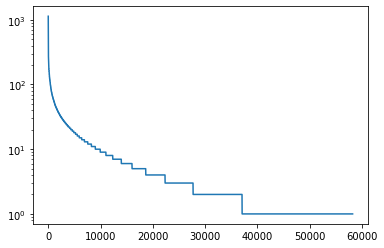

In [27]:
#degree analysis
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
plt.yscale('log')
plt.plot(degree_sequence)

print("average degree: " + str(sum(degree_sequence)/len(degree_sequence)))
#wtf? average degree 7?
print(degree_sequence.count(min(degree_sequence)))
#ah, ecco perchè.

print("degree sequence: " + str(degree_sequence[0:10]))

In [24]:
#Degree correlation
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(G)))
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(largest_component)))

Degree correlation: 0.010815796314560526
Degree correlation: 0.009622679947904176


Counter({0: 9301, 2: 8116, 19: 3646, 5: 2933, 41: 1768, 33: 1708, 3: 1624, 8: 1562, 7: 1551, 11: 1316, 20: 1297, 6: 1114, 24: 1049, 42: 1019, 54: 841, 4: 819, 16: 813, 13: 754, 9: 743, 18: 715, 22: 706, 40: 612, 32: 609, 30: 606, 44: 600, 48: 599, 17: 539, 14: 538, 49: 526, 25: 497, 34: 494, 1: 483, 21: 461, 43: 449, 12: 429, 15: 399, 23: 398, 56: 354, 47: 348, 53: 330, 51: 303, 46: 296, 52: 291, 35: 255, 29: 237, 10: 234, 75: 234, 26: 230, 39: 204, 45: 178, 27: 154, 61: 109, 59: 87, 57: 86, 91: 57, 107: 40, 64: 25, 31: 22, 60: 22, 97: 22, 96: 16, 133: 16, 134: 14, 78: 13, 93: 13, 155: 13, 219: 12, 84: 11, 160: 11, 225: 11, 228: 11, 85: 10, 123: 10, 198: 10, 199: 10, 236: 10, 36: 9, 66: 9, 83: 9, 129: 9, 137: 9, 140: 9, 194: 9, 114: 8, 176: 8, 214: 8, 215: 8, 86: 7, 87: 7, 104: 7, 109: 7, 110: 7, 149: 7, 222: 7, 240: 7, 67: 6, 80: 6, 88: 6, 117: 6, 122: 6, 126: 6, 128: 6, 157: 6, 179: 6, 180: 6, 182: 6, 201: 6, 203: 6, 211: 6, 227: 6, 229: 6, 245: 6, 251: 6, 253: 6, 37: 5, 58: 5, 63: 5

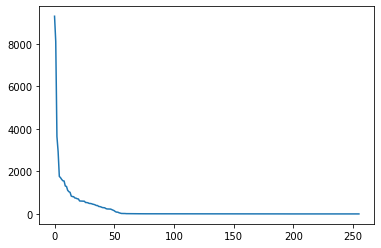

In [25]:
#community detection
#communities = community_louvain.best_partition(G)
largest_component_communities = community.community_louvain.best_partition(largest_component)
# number of communities
#print(Counter(communities.values()))
print(Counter(largest_component_communities.values()))
plt.plot(sorted(Counter(largest_component_communities.values()).values(),reverse=True))
#per ignorare quelle da due è meglio valutare solo la largest_component

In [26]:
#degree correlation
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(G)))
print("Degree correlation: "+str(nx.degree_pearson_correlation_coefficient(largest_component)))


Degree correlation: 0.010815796314560526
Degree correlation: 0.009622679947904176
